In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Load dataset
file_path = r"C:\Users\Alexis\Documents\Marketing Testing\Data\marketing_AB.csv"

#Read data
df = pd.read_csv(file_path)

#View head
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
#drop random index 
df = df.drop(columns=['Unnamed: 0'])

#Double check
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
#Check for missing data
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [ ]:
#Hurrah no missing values!

In [25]:
# Summary statistics for conversion data
conversion_summary = df['converted'].describe()
print(conversion_summary)

# Summary statistics for other relevant columns
ads_summary = df[['total ads', 'most ads hour']].describe()
print(ads_summary)


count     588101
unique         2
top        False
freq      573258
Name: converted, dtype: object
           total ads  most ads hour
count  588101.000000  588101.000000
mean       24.820876      14.469061
std        43.715181       4.834634
min         1.000000       0.000000
25%         4.000000      11.000000
50%        13.000000      14.000000
75%        27.000000      18.000000
max      2065.000000      23.000000


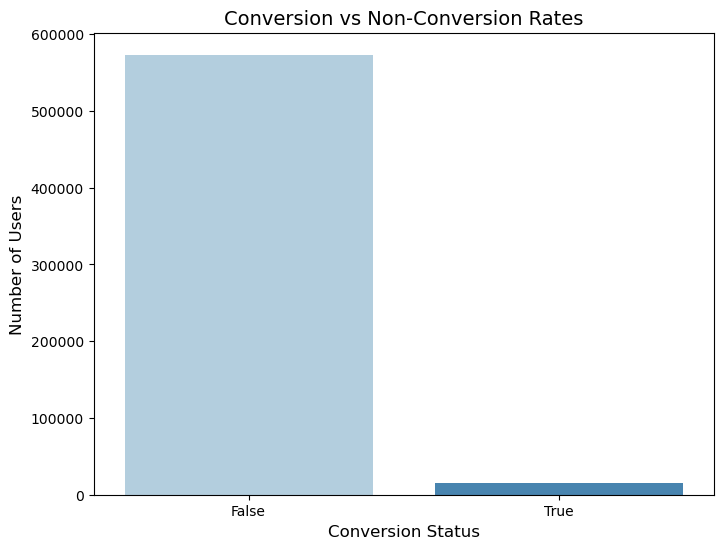

In [23]:
# Count the number of conversions (True) and non-conversions (False)
conversion_counts = df['converted'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_counts.index, y=conversion_counts.values, palette="Blues")

# Add labels and title
plt.xlabel('Conversion Status', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Conversion vs Non-Conversion Rates', fontsize=14)

# Display the plot and save
plt.savefig("Conversion Vs Non-Conversion Rates")
plt.show()

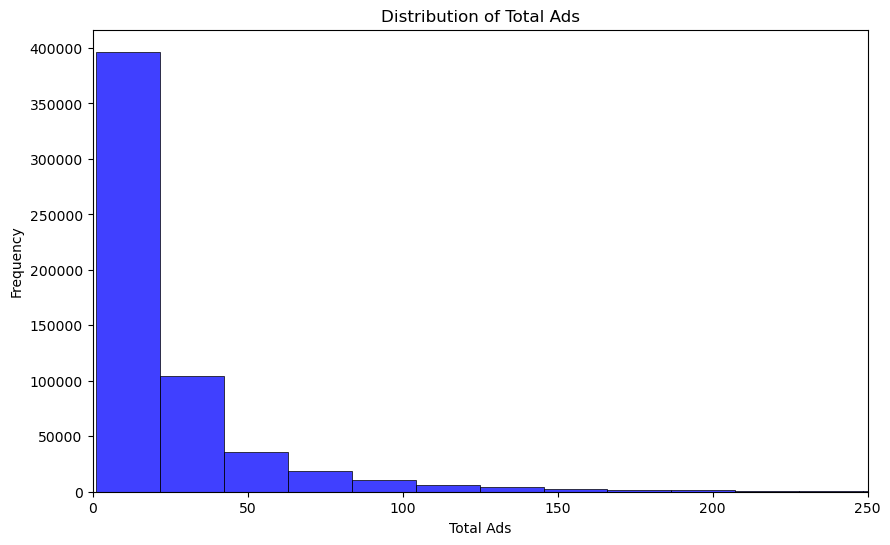

In [47]:
# Plot histogram for total ads with limited x-axis
plt.figure(figsize=(10,6))
sns.histplot(df['total ads'], bins=100, kde=False, color='blue')
plt.title('Distribution of Total Ads')
plt.xlim(0, 250)  # Set x-axis limit to display up to 500 ads
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.savefig("Distribution of Total Ads")
plt.show()


test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


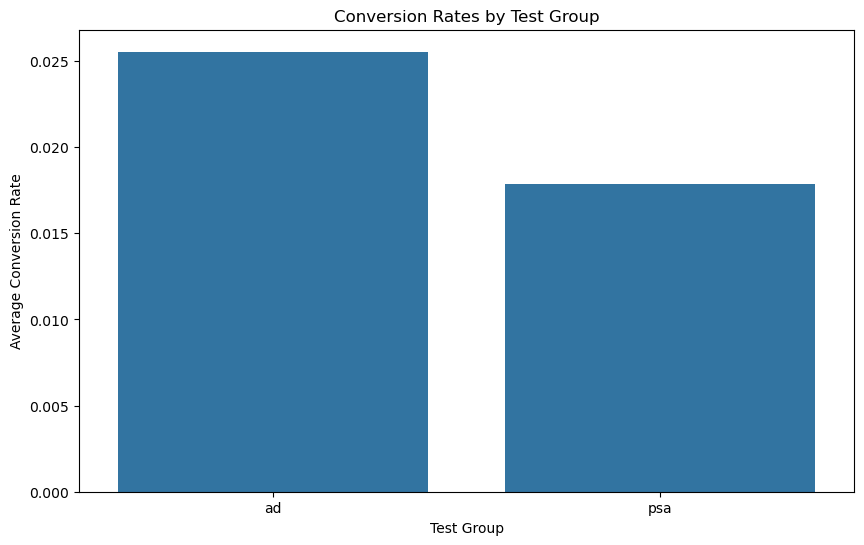

In [49]:
# Grouping by test group and comparing the conversion rates
group_comparison = df.groupby('test group')['converted'].mean()
print(group_comparison)

# Plotting the comparison
plt.figure(figsize=(10,6))
sns.barplot(x=group_comparison.index, y=group_comparison.values)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Average Conversion Rate')
plt.savefig("Conversion Rates by Test Group")
plt.show()


most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64


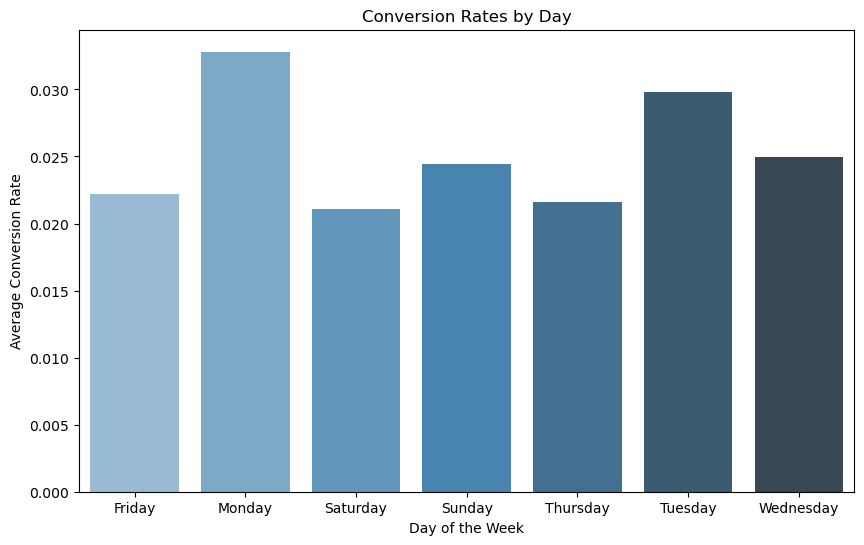

In [51]:
# Group by day and compare conversion rates
day_comparison = df.groupby('most ads day')['converted'].mean()
print(day_comparison)

# Plot the day-wise comparison
plt.figure(figsize=(10,6))
sns.barplot(x=day_comparison.index, y=day_comparison.values, palette="Blues_d")
plt.title('Conversion Rates by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Conversion Rate')
plt.savefig("Conversion Rates by Day")
plt.show()


In [ ]:
# A/B Testing: Statistical Comparison of Conversion Rates between 'ad' and 'psa' Groups
# 
# In this section, I will conduct an A/B test to statistically analyze the difference in conversion rates between 
# two groups of users: those who were shown advertisements ('ad' group) and those who were shown public service 
# announcements ('psa' group). This will help determine if one method is significantly more effective at driving conversions.
#
# To achieve this, I will perform a two-sample z-test for proportions. This test will compare the proportion of 
# converted users in each group and test the null hypothesis (no difference in conversion rates) against the 
# alternative hypothesis (a significant difference in conversion rates). 
#
# Steps:
# 1. Calculate conversion rates for both 'ad' and 'psa' groups.
# 2. Apply the z-test for proportions to check if the observed difference is statistically significant  .
# 3. Interpret the results and determine whether we can reject the null hypothesis.


In [21]:
# Step 1: Calculate conversions and total users in each group
conversions_ad = df[df['test group'] == 'ad']['converted'].sum()
total_ad = df[df['test group'] == 'ad'].shape[0]

conversions_psa = df[df['test group'] == 'psa']['converted'].sum()
total_psa = df[df['test group'] == 'psa'].shape[0]

# Step 2: Apply two-sample z-test for proportions
from statsmodels.stats.proportion import proportions_ztest

counts = np.array([conversions_ad, conversions_psa])
nobs = np.array([total_ad, total_psa])

z_stat, p_value = proportions_ztest(counts, nobs)

# Step 3: Interpret the result
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between ad and psa groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between ad and psa groups.")


Z-statistic: 7.3700781265454145, P-value: 1.7052807161559727e-13
Reject the null hypothesis: Significant difference between ad and psa groups.


In [14]:
#Yay! Lets interpret
conversion_rate_ad = conversions_ad / total_ad
conversion_rate_psa = conversions_psa / total_psa

print(f"Conversion rate for ad group: {conversion_rate_ad}")
print(f"Conversion rate for PSA group: {conversion_rate_psa}")


Conversion rate for ad group: 0.025546559636683747
Conversion rate for PSA group: 0.01785410644448223


In [18]:
#The ad group had a higher conversion rate compared to the PSA group, with a statistically significant difference between the two.
#This suggests that using ads is a more effective method for driving conversions based on this test.